# we are using nearest neighbour ball_tree algorithm to get matching pairs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


In [3]:
def matching_pairs(treated_df, non_treated_df, scaler=True):

    treated_x = treated_df.values
    non_treated_x = non_treated_df.values
    if scaler == True:
        scaler = StandardScaler()
    if scaler:
        scaler.fit(treated_x)
        treated_x = scaler.transform(treated_x)
        non_treated_x = scaler.transform(non_treated_x)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(non_treated_x)
    distances, indices = nbrs.kneighbors(treated_x)
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.ix[indices]
    return matched

C:\Users\Sidhant\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


(-1, 2)

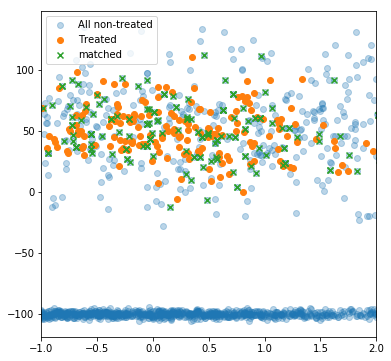

In [4]:
treated_df = pd.DataFrame()
np.random.seed(1)

size_1 = 200
size_2 = 1000
treated_df['x'] = np.random.normal(0,1,size=size_1)
treated_df['y'] = np.random.normal(50,20,size=size_1)
treated_df['z'] = np.random.normal(0,100,size=size_1)

non_treated_df = pd.DataFrame()
# two different populations
non_treated_df['x'] = list(np.random.normal(0,3,size=size_2)) + list(np.random.normal(-1,2,size=2*size_2))
non_treated_df['y'] = list(np.random.normal(50,30,size=size_2)) + list(np.random.normal(-100,2,size=2*size_2))
non_treated_df['z'] = list(np.random.normal(0,200,size=size_2)) + list(np.random.normal(13,200,size=2*size_2))


matched_df = matching_pairs(treated_df, non_treated_df)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(non_treated_df['x'], non_treated_df['y'], alpha=0.3, label='All non-treated')
plt.scatter(treated_df['x'], treated_df['y'], label='Treated')
plt.scatter(matched_df['x'], matched_df['y'], marker='x', label='matched')
plt.legend()
plt.xlim(-1,2)